<a href="https://colab.research.google.com/github/Israel-San-Agustin/METODOS-NUMERICOS-/blob/main/M%C3%A9todo_de_M%C3%BCller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Müller

El método de Muller es una técnica numérica que se emplea para localizar las raíces de funciones. Es una versión ampliada del método de la secante y el método de bisección. Este enfoque se vale de una interpolación cuadrática para estimar la raíz de una función. En particular, utiliza tres puntos para construir un polinomio cuadrático que se ajusta a la función en esos puntos, y luego la raíz de ese polinomio se toma como una nueva aproximación de la raíz de la función.

dada la funcion:

$f(x)= x^4 - 3x^3 + x^2 + x+1$

In [13]:
from math import *  # Librería para operaciones matemáticas
import numpy as np
import matplotlib.pyplot as plt  #libreria para graficar

In [14]:
# Colocamos la función dada
def f(x):
    return x**4 - 3*x**3 + x**2 + x+1

In [15]:
#valores iniciales
#dados lo valores iniciales
p_0=0.5
p_1=-0.5
p_2=0
Tol = 10**(-5)  # Tolerancia de 0.00001
Nom = 100  # Número máximo de iteraciones
niter = 3

In [16]:
# Método de Müller
# Imprime el encabezado para la tabla de iteraciones
print("# iter\t\t p_1 \t\t f(p_1) \t\t error")

# Inicialización de las variables de los pasos iniciales
h_1 = p_1 - p_0
h_2 = p_2 - p_1
δ_1 = (f(p_1) - f(p_0)) / h_1
δ_2 = (f(p_2) - f(p_1)) / h_2
d = (δ_2 - δ_1) / (h_2 + h_1)

# Ciclo iterativo para aplicar el método
while niter < Nom:  # Asegura que el número de iteraciones no supere el máximo permitido
    b = δ_2 + h_2 * d
    # Corregido el cálculo de la raíz cuadrada (el exponente debe ser 0.5)
    D = (b ** 2 - 4 * f(p_2) * d) ** 0.5

    # Se selecciona la E con menor magnitud para evitar la cancelación numérica
    if abs(b - D) < abs(b + D):
        E = b + D
    else:
        E = b - D

    # Calcula el valor de h y la nueva aproximación p
    h = -2 * f(p_2) / E
    p = p_2 + h

    # Verifica la convergencia con el criterio de tolerancia
    if abs(h) < Tol:
        print("{0}\t\t {1:6.6f} \t {2:6.6f} \t {3:6.6f}".format(niter + 1, p, f(p), abs(h)))
        print("El procedimiento fue exitoso.")
        print(f"La raíz resultante es: {p:.10f}")
        break

    # Actualiza los valores para la siguiente iteración
    p_0 = p_1
    p_1 = p_2
    p_2 = p
    h_1 = p_1 - p_0
    h_2 = p_2 - p_1
    δ_1 = (f(p_1) - f(p_0)) / h_1
    δ_2 = (f(p_2) - f(p_1)) / h_2
    d = (δ_2 - δ_1) / (h_2 + h_1)

    # Calcula el error relativo
    error_relativo = abs(h) / abs(p_2)

    # Imprime los valores de la iteración actual
    print("{0}\t\t {1:6.6f} \t {2:6.6f} \t {3:6.6f}".format(niter, p, f(p), error_relativo))

    # Incrementa el número de iteraciones
    niter += 1

# Si el ciclo termina sin convergencia, se informa al usuario
if abs(h) >= Tol:
    print("El procedimiento no fue exitoso.")
    print(f"La raíz resultante es: {p_1:.10f}")


# iter		 p_1 		 f(p_1) 		 error
3		 -0.100000-0.888819j 	 -0.011200-3.014876j 	 1.000000
4		 -0.492146-0.447031j 	 -0.169121+0.736733j 	 0.888490
5		 -0.352226-0.484132j 	 -0.178601-0.018187j 	 0.241781
6		 -0.340229-0.443036j 	 0.011976+0.010556j 	 0.076642
7		 -0.339095-0.446656j 	 -0.000106-0.000039j 	 0.006766
8		 -0.339093-0.446630j 	 0.000000-0.000000j 	 0.000047
10		 -0.339093-0.446630j 	 0.000000+0.000000j 	 0.000000
El procedimiento fue exitoso.
La raíz resultante es: -0.3390928378-0.4466301000j


In [17]:
x = np.linspace(-10, 10, 400)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


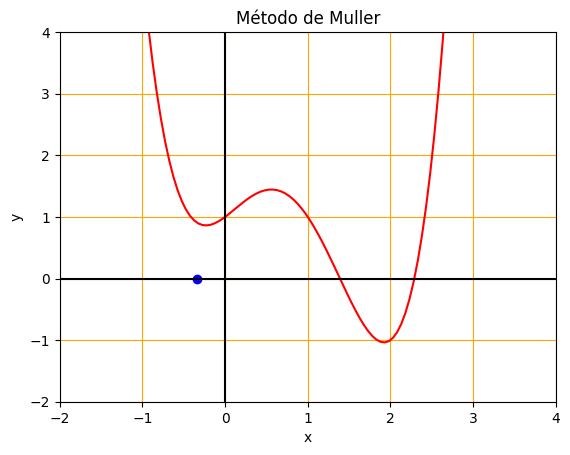

In [22]:
# Crear la gráfica
plt.plot(x, f(x), color="red")
plt.title("Método de Muller")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color="orange")
#punto donde se encuentra la raiz
plt.scatter(p_1, f(p_1), color="blue")
plt.show()